In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns

In [2]:
df_h = pd.read_csv('/project_data/data_asset/Sample Heloc Data Dummy Values.csv')
df_h.head()

,#year,facility,accountNumber,FICO,BKRPT,recordCount,defaultCount,defaultDate,defaultBalance,cureDate,...,origLTV,origDTI,origCollateralValue,collateralCode,productCode,ID,enteredDate,age,lienPosition,Customer Balance
0,2017,HOF,1,839.0,973.0,1,0,NaN,0,NaN,...,21.1,50.1,10000,OO01,595,1,3/1/2000,1.2,1,101.1
1,2017,HOS,2,683.0,483.0,1,0,NaN,0,NaN,...,40.0,60.2,12000,OO02,595,2,4/1/2012,2.0,2,201.1
2,2017,HOF,3,775.0,837.0,1,0,NaN,0,NaN,...,12.1,70.3,11000,OO01,595,3,2/1/2010,3.2,1,302.2
3,2018,HOF,4,NaN,973.0,1,0,NaN,0,NaN,...,22.2,50.1,10000,OO01,595,4,3/1/2000,3.2,1,95.1
4,2018,HOS,5,695.0,483.0,1,0,NaN,0,NaN,...,17.9,60.2,12000,OO02,595,5,4/1/2012,4.0,2,75.5


In [3]:
df_h.columns

Index(['#year', 'facility', 'accountNumber', 'FICO', 'BKRPT', 'recordCount',
       'defaultCount', 'defaultDate', 'defaultBalance', 'cureDate', 'origFICO',
       'origBKRPT', 'faceAmountOfNote', 'vintage', 'origLTV', 'origDTI',
       'origCollateralValue', 'collateralCode', 'productCode', 'ID',
       'enteredDate', 'age', 'lienPosition', 'Customer Balance'],
      dtype='object')

In [4]:
df_h['caPerformanceFlag'] = np.where(pd.isnull(df_h.defaultDate), 0, 1)

In [96]:
df_h

,#year,facility,accountNumber,FICO,BKRPT,recordCount,defaultCount,defaultDate,defaultBalance,cureDate,...,origDTI,origCollateralValue,collateralCode,productCode,ID,enteredDate,age,lienPosition,Customer Balance,caPerformanceFlag
0,2017,HOF,1,839.0,973.0,1,0,NaN,0,NaN,...,50.1,10000,OO01,595,1,3/1/2000,1.2,1,101.1,0
1,2017,HOS,2,683.0,483.0,1,0,NaN,0,NaN,...,60.2,12000,OO02,595,2,4/1/2012,2.0,2,201.1,0
2,2017,HOF,3,775.0,837.0,1,0,NaN,0,NaN,...,70.3,11000,OO01,595,3,2/1/2010,3.2,1,302.2,0
3,2018,HOF,4,NaN,973.0,1,0,NaN,0,NaN,...,50.1,10000,OO01,595,4,3/1/2000,3.2,1,95.1,0
4,2018,HOS,5,695.0,483.0,1,0,NaN,0,NaN,...,60.2,12000,OO02,595,5,4/1/2012,4.0,2,75.5,0
5,2018,HOF,6,751.0,NaN,1,0,NaN,0,NaN,...,70.3,11000,OO01,595,6,2/1/2010,1.8,1,50.2,0


In [5]:
df = pd.read_csv('/project_data/data_asset/Test_fields_100821_results.csv')
df.head()

,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,DOWNNAME,TRUEFIELD,YARDSGAINED_Mean,AVG_OVER_TOGO,PLAYIDSTR,RUN_PASS,CONCEPT_8,CONCEPT_9,pred_TD,prob_TD_NO,prob_TD_YES,pred_FIRST,prob_FIRST_NO,prob_FIRST_YES
0,0,0,5,0,480,1st,35,6.360000,1.272000,100000020,RUN,2,0,N,0.989181,0.010819,N,0.562406,0.437594
1,0,0,9,-7,1050,1st,45,4.756098,0.528455,100000054,RUN,5,4,N,0.999278,0.000722,Y,0.439296,0.560704
2,0,2,4,7,600,3rd,5,8.164835,2.041209,200000049,PASS,4,9,N,0.929720,0.070280,Y,0.391968,0.608032
3,0,0,11,7,180,1st,45,6.216667,0.565152,200000041,PASS,4,1,N,0.999941,0.000059,N,0.676803,0.323197
4,0,0,1,0,60,1st,45,13.416667,13.416667,200000085,PASS,8,5,N,0.800383,0.199617,N,0.608495,0.391505


In [6]:
df.columns

Index(['HALF', 'DOWNNUM', 'YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'DOWNNAME',
       'TRUEFIELD', 'YARDSGAINED_Mean', 'AVG_OVER_TOGO', 'PLAYIDSTR',
       'RUN_PASS', 'CONCEPT_8', 'CONCEPT_9', 'pred_TD', 'prob_TD_NO',
       'prob_TD_YES', 'pred_FIRST', 'prob_FIRST_NO', 'prob_FIRST_YES'],
      dtype='object')

In [99]:
df.shape

(10000, 19)

In [100]:
## To drop variables from a dataframe, simply list the ones you want to keep. Can pass to a new dataframe (as here) or drop from original
df = pd.DataFrame(df, columns=['HALF', 'DOWNNUM', 'YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'DOWNNAME','TRUEFIELD','RUN_PASS',
       'CONCEPT_8', 'CONCEPT_9','YARDSGAINED_Mean', 'AVG_OVER_TOGO', 'prob_FIRST_YES','pred_FIRST'])

In [101]:
## Re-Name columns
df.columns = ['HALF', 'DOWNNUM', 'YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'DOWNNAME','TRUEFIELD','RUN_PASS',
       'CONCEPT_8', 'CONCEPT_9','YARDSGAINED_Mean', 'AVG_OVER_TOGO', 'prob_FIRST_YES','TARGET']

In [102]:
len(df.columns)

14

In [103]:
df.shape

(10000, 14)

In [19]:
df.dtypes

HALF                  int64
DOWNNUM               int64
YARDSTOGO             int64
SCOREDIFF             int64
TIMELEFT              int64
DOWNNAME             object
TRUEFIELD             int64
YARDSGAINED_Mean    float64
AVG_OVER_TOGO       float64
PLAYIDSTR             int64
RUN_PASS             object
CONCEPT_8             int64
CONCEPT_9             int64
pred_TD              object
prob_TD_NO          float64
prob_TD_YES         float64
pred_FIRST           object
prob_FIRST_NO       float64
prob_FIRST_YES      float64
dtype: object

In [ ]:
df['period'] = df[['Year', 'quarter', ...]].agg('-'.join, axis=1)

In [ ]:
df['c'] = df.apply(lambda row: row.a + row.b, axis=1)
df

In [49]:
df['PLAYID'] = df["RUN_PASS"] + df["CONCEPT_8"].astype(str)

In [44]:
df.head()

,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,DOWNNAME,TRUEFIELD,YARDSGAINED_Mean,AVG_OVER_TOGO,PLAYIDSTR,RUN_PASS,CONCEPT_8,CONCEPT_9,pred_TD,prob_TD_NO,prob_TD_YES,pred_FIRST,prob_FIRST_NO,prob_FIRST_YES,PLAYID
0,0,0,5,0,480,1st,35,6.360000,1.272000,100000020,RUN,2,0,N,0.989181,0.010819,N,0.562406,0.437594,RUN20
1,0,0,9,-7,1050,1st,45,4.756098,0.528455,100000054,RUN,5,4,N,0.999278,0.000722,Y,0.439296,0.560704,RUN54
2,0,2,4,7,600,3rd,5,8.164835,2.041209,200000049,PASS,4,9,N,0.929720,0.070280,Y,0.391968,0.608032,PASS49
3,0,0,11,7,180,1st,45,6.216667,0.565152,200000041,PASS,4,1,N,0.999941,0.000059,N,0.676803,0.323197,PASS41
4,0,0,1,0,60,1st,45,13.416667,13.416667,200000085,PASS,8,5,N,0.800383,0.199617,N,0.608495,0.391505,PASS85


In [105]:
df['probBIN'] = pd.qcut(df('prob_FIRST_YES','', 5)

In [106]:
df.probBIN.value_counts()

(0.132, 0.397]    2001
(0.686, 0.899]    2000
(0.605, 0.686]    2000
(0.511, 0.605]    2000
(0.397, 0.511]    1999
Name: probBIN, dtype: int64

In [107]:
df.head()

,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,DOWNNAME,TRUEFIELD,RUN_PASS,CONCEPT_8,CONCEPT_9,YARDSGAINED_Mean,AVG_OVER_TOGO,prob_FIRST_YES,TARGET,probBIN
0,0,0,5,0,480,1st,35,RUN,2,0,6.360000,1.272000,0.437594,N,"(0.397, 0.511]"
1,0,0,9,-7,1050,1st,45,RUN,5,4,4.756098,0.528455,0.560704,Y,"(0.511, 0.605]"
2,0,2,4,7,600,3rd,5,PASS,4,9,8.164835,2.041209,0.608032,Y,"(0.605, 0.686]"
3,0,0,11,7,180,1st,45,PASS,4,1,6.216667,0.565152,0.323197,N,"(0.132, 0.397]"
4,0,0,1,0,60,1st,45,PASS,8,5,13.416667,13.416667,0.391505,N,"(0.132, 0.397]"


In [108]:
##GGPLOT calls for the dataframe plus aesthetics (aes) which includes the x and y features to be plotted

# ggplot(tmp.df, aes(roundedAge, badrate_by_age))+
#       geom_point()+
#       labs(
#         x = "Age (Rounded)",
#         y = "Bad Rate"
#       )

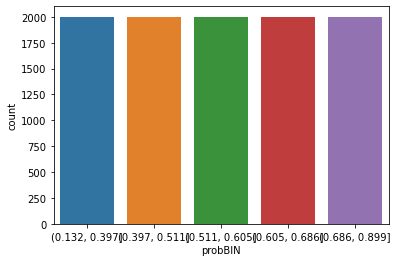

In [109]:
import seaborn as sns

#sns.set_theme(style="whitegrid")

ax = sns.countplot(x="probBIN", data=df)

In [ ]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm", kind="kde")

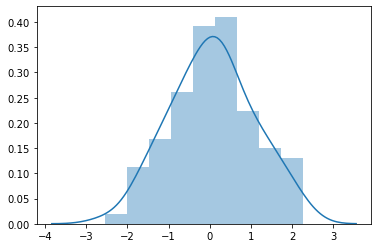

In [7]:
import seaborn as sns, numpy as np

#sns.set_theme(); 
np.random.seed(0)

x = np.random.randn(100)

ax = sns.distplot(x)

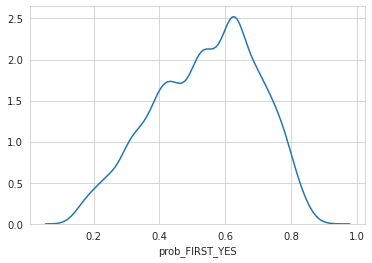

In [77]:
#data = sns.load_dataset("df")

x = df.prob_FIRST_YES
y = df.prob_TD_YES

sns.distplot(x, kde=True, hist=False)

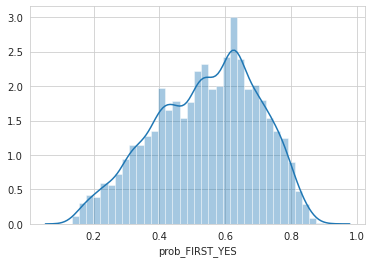

In [17]:
#sns.displot(diamonds, x="carat", kde=True)
sns.distplot(x, kde=True)

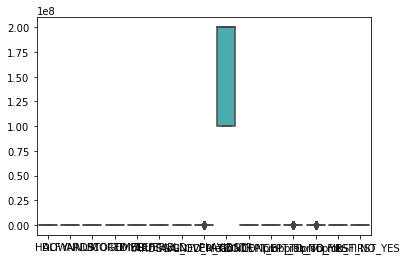

In [15]:
# Boxplot
sns.boxplot(data=df)

In [46]:
# Set theme
sns.set_style('whitegrid')

In [30]:
df.PLAYID.nunique()

1

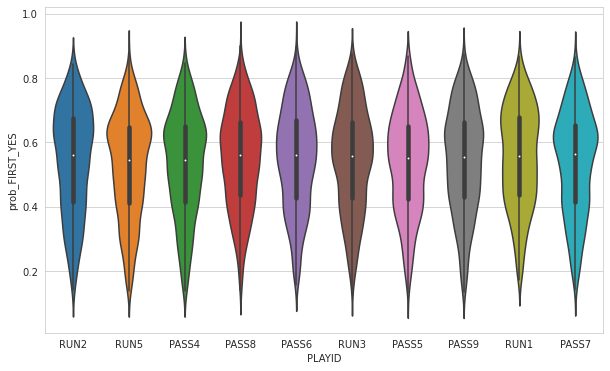

In [50]:
# Violin plot
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
sns.violinplot(x=df.PLAYID, y=df.prob_FIRST_YES)

In [ ]:
sns.boxplot(x="day", y="total_bill", data=tips)

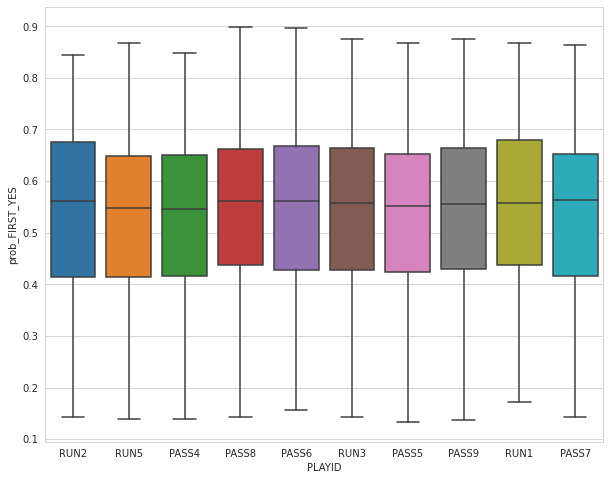

In [65]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df.PLAYID, y=df.prob_FIRST_YES)

In [ ]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

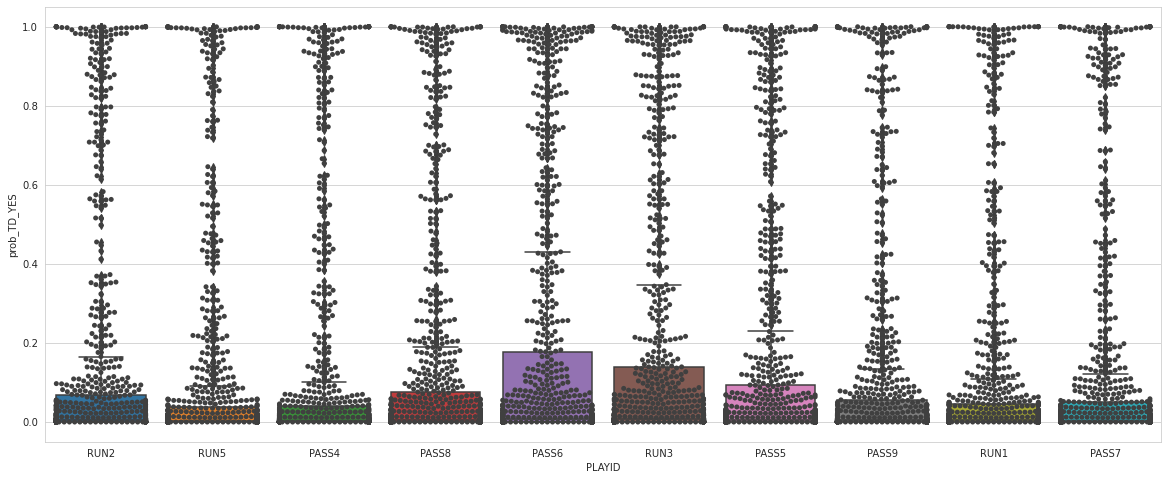

In [56]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(x=df.PLAYID, y=df.prob_TD_YES)

ax = sns.swarmplot(x=df.PLAYID, y=df.prob_TD_YES, color=".25")

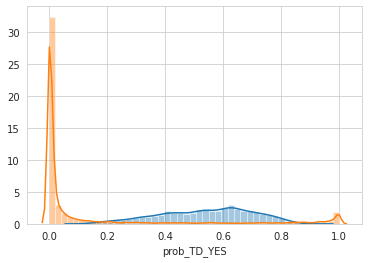

In [78]:
sns.distplot(x)
sns.distplot(y);

In [30]:
sns.__version__

'0.10.1'

In [ ]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

In [ ]:
# boxplot for Concept 9 play 0, probability of first down with each yard to go
fig1, ax1 = plt.subplots()
ax1.set_title('Concept 9 Play 0: Probably of First Down')
bp_data = []

for d in data.groups:
    playid = d
    prob_FIRST_YES = data.get_group(yardstogo)
    bp_data.append(prob_FIRST_YES['prob_FIRST_YES'].values)
#     print(d, prob_FIRST_YES['prob_FIRST_YES'].values)
#     print()
ax1.boxplot(bp_data)
plt.xlabel("PLAY ID")
plt.ylabel("prob_FIRST_YES")

# Additional Points
plt.plot(5, 0.5, 'go') # add green dot to yardtogo=5 and prob_FIRST_YES=0.5
plt.plot(2, 0.7, 'ro') # add red dot to yardtogo=2 and prob_FIRST_YES=0.7

plt.show()

<Figure size 720x432 with 0 Axes>

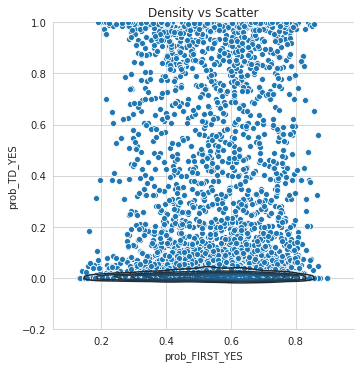

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df = pd.read_csv('Pokemon.csv', encoding='ISO-8859-1')

# plot
plt.figure(figsize=(10,6))
sns.relplot(x='prob_FIRST_YES', y='prob_TD_YES', data=df)
sns.kdeplot(df.prob_FIRST_YES, df.prob_TD_YES)
plt.ylim(-0.2, 1.0)
plt.title('Density vs Scatter');

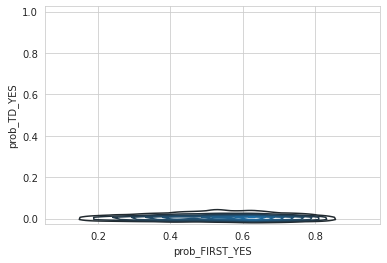

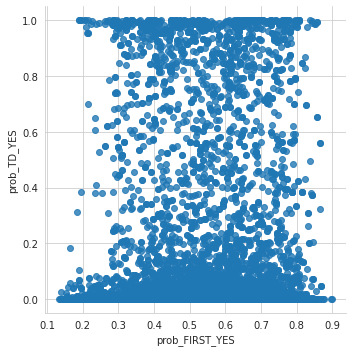

In [87]:
sns.kdeplot(df.prob_FIRST_YES, df.prob_TD_YES)
sns.lmplot(x='prob_FIRST_YES', y='prob_TD_YES', data=df, fit_reg=False)

In [33]:
x = df.prob_FIRST_YES
y = df.prob_TD_YES

(<seaborn.axisgrid.FacetGrid at 0x7fff72a21710>,)

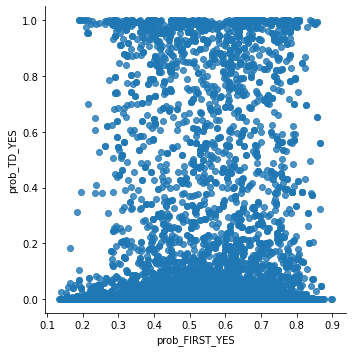

In [36]:
# Scatterplot arguments
sns.lmplot(x='prob_FIRST_YES', y='prob_TD_YES', data=df,
           fit_reg=False), # No regression line
#           hue='Stage')   # Color by evolution stage

In [ ]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

In [ ]:
ax = sns.distplot(x, kde=True, hist=False,  bw_adjust=.25)

In [21]:
x

0       0.437594
1       0.560704
2       0.608032
3       0.323197
4       0.391505
          ...   
9995    0.467382
9996    0.294593
9997    0.612723
9998    0.603927
9999    0.668898
Name: prob_FIRST_YES, Length: 10000, dtype: float64

In [110]:
df.dtypes

HALF                   int64
DOWNNUM                int64
YARDSTOGO              int64
SCOREDIFF              int64
TIMELEFT               int64
DOWNNAME              object
TRUEFIELD              int64
RUN_PASS              object
CONCEPT_8              int64
CONCEPT_9              int64
YARDSGAINED_Mean     float64
AVG_OVER_TOGO        float64
prob_FIRST_YES       float64
TARGET                object
probBIN             category
dtype: object

In [111]:
df_numeric = df.select_dtypes(include=[np.number])

In [112]:
df_numeric

,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,TRUEFIELD,CONCEPT_8,CONCEPT_9,YARDSGAINED_Mean,AVG_OVER_TOGO,prob_FIRST_YES
0,0,0,5,0,480,35,2,0,6.360000,1.272000,0.437594
1,0,0,9,-7,1050,45,5,4,4.756098,0.528455,0.560704
2,0,2,4,7,600,5,4,9,8.164835,2.041209,0.608032
3,0,0,11,7,180,45,4,1,6.216667,0.565152,0.323197
4,0,0,1,0,60,45,8,5,13.416667,13.416667,0.391505
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,2,5,0,30,35,1,9,6.430769,1.286154,0.467382
9996,0,2,11,-7,1200,35,8,5,13.416667,1.219697,0.294593
9997,0,2,4,0,1050,25,3,3,6.005976,1.501494,0.612723
9998,0,2,2,7,900,5,4,9,8.164835,4.082418,0.603927


In [113]:
df_target = df.TARGET

In [114]:
df_target

0       N
1       Y
2       Y
3       N
4       N
       ..
9995    N
9996    N
9997    Y
9998    Y
9999    Y
Name: TARGET, Length: 10000, dtype: object

In [115]:
df_numeric.columns

Index(['HALF', 'DOWNNUM', 'YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'TRUEFIELD',
       'CONCEPT_8', 'CONCEPT_9', 'YARDSGAINED_Mean', 'AVG_OVER_TOGO',
       'prob_FIRST_YES'],
      dtype='object')

In [139]:
df_sm = df.loc[df['YARDSTOGO'] < 5]
df_lg = df.loc[df['YARDSTOGO'] >= 5]

In [140]:
df_lg.shape

(5915, 15)

In [116]:
from sklearn.model_selection import train_test_split

## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X = df_numeric.values
y = df['TARGET'].values

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,stratify=y, random_state=121)


In [117]:
##df['strat'] = df['pred_FIRST'].astype(str) + df['probBIN'].astype(str)

In [118]:
#df['strat']

In [119]:
X

array([[ 0.        ,  0.        ,  5.        , ...,  6.36      ,
         1.272     ,  0.43759366],
       [ 0.        ,  0.        ,  9.        , ...,  4.756098  ,
         0.52845533,  0.56070423],
       [ 0.        ,  2.        ,  4.        , ...,  8.164835  ,
         2.04120875,  0.60803176],
       ...,
       [ 0.        ,  2.        ,  4.        , ...,  6.005976  ,
         1.501494  ,  0.61272271],
       [ 0.        ,  2.        ,  2.        , ...,  8.164835  ,
         4.0824175 ,  0.60392733],
       [ 0.        ,  2.        ,  6.        , ..., 13.70354   ,
         2.28392333,  0.66889815]])

In [120]:
# from sklearn.model_selection import train_test_split

# ## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# X = df_rev.drop(['pred_FIRST'], axis=1).values
# y = df_rev['pred_FIRST'].values

# train, test = train_test_split(df, test_size=0.3,stratify=df[['strat']], random_state=121)


In [121]:
print(train_X)

[[ 0.          0.          9.         ... 12.42        1.38
   0.38933394]
 [ 0.          0.          8.         ... 10.824561    1.35307012
   0.33439925]
 [ 0.          0.          6.         ...  3.166667    0.52777783
   0.60371454]
 ...
 [ 0.          0.          8.         ... 10.824561    1.35307012
   0.34704485]
 [ 0.          2.          3.         ...  4.5         1.5
   0.75764355]
 [ 0.          2.          5.         ...  3.166667    0.6333334
   0.72173832]]


In [122]:
train_X.shape

(7000, 11)

In [123]:
train_y

array(['N', 'N', 'Y', ..., 'N', 'Y', 'Y'], dtype=object)

In [124]:
df_y = pd.DataFrame(train_y, columns = ['Train_Y'])

In [125]:
df_test_y = pd.DataFrame(test_y, columns = ['Test_Y'])

In [126]:
df_y.Train_Y.value_counts()

Y    4368
N    2632
Name: Train_Y, dtype: int64

In [127]:
df_y.Train_Y.value_counts('Y')

Y    0.624
N    0.376
Name: Train_Y, dtype: float64

In [128]:
df_test_y.Test_Y.value_counts('Y')

Y    0.624
N    0.376
Name: Test_Y, dtype: float64

In [129]:
len(train_X)

7000

In [130]:
test_y

array(['N', 'N', 'N', ..., 'Y', 'Y', 'N'], dtype=object)

In [131]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(train_X)
scaler

X_scaled = scaler.transform(train_X)

In [132]:
from sklearn.linear_model import LogisticRegression

## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# instantiate the model (using the default parameters)
logit = LogisticRegression()

# fit the model with data
model = logit.fit(X_scaled,train_y)

In [133]:
model.score(test_X, test_y)

0.624

In [135]:
import sklearn.pipeline
from sklearn.metrics import roc_curve, roc_auc_score
### call pipeline.predict() on your X_test data to make a set of test predictions
y_prediction = model.predict(test_X)

### test your predictions using sklearn.classification_report()
report = sklearn.metrics.classification_report(test_y, y_prediction)

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
